<center>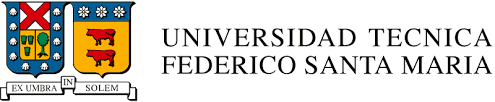</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Regularización
* SVM


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 12 de Mayo, en horario de clases.
* Fecha de entrega: 13 de Mayo. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif



# 1. Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl

La regresión lineal es un modelo matemático que pertenece al aprendizaje supervisado, el cual intenta aplicar relaciones que predigan el resultado de un evento basándose en los datos de variables independientes. Llamaremos a este resultado: variable objetivo o _target_, y como es un modelo de regresión lineal la variable objetivo es una variable continua.

<center><img src=https://t4.ftcdn.net/jpg/02/32/47/13/360_F_232471334_vfDHKHeRHtwkn0zvd8SM98THwQeYDn8y.jpg></center>

Los sistemas de bicicletas compartidas son un medio para alquilar bicicletas en el que el proceso de afiliación, alquiler y devolución se automatiza a través de una red de _quioscos o puntos de estacionamiento_ repartidos por toda la ciudad. Gracias a estos sistemas, los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten.

En esta pregunta se le proporcionan datos de alquiler de la cantidad de bicicletas arrendadas por hora durante dos años según variables climáticas y laborales. 

Usted tiene separar el dataset en un conjunto de entrenamiento y en un conjunto de prueba, y el objetivo de esta pregunta será: **predecir el número total de bicicletas alquiladas en el conjunto de pruebas**.

La base de datos y toda la información asociada a esta se puede encontrar en el siguiente link: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Existen distintas formas para obtener los datos, de las cuales usted debe elegir solo uno:

1. Puede descargarlos y guardarlos en su directorio local y luego cargar los datos usando este notebook con Jupyter.

2. Puede utilizar google colab. En este caso existen 2 formas de cargar los datos, montando su cuenta de google drive en el colab y guardar los datos en una carpeta de drive. La otra forma es cargar los datos de forma en la máquiva virtual que le asigna colab de manera **temporal**. Tenga cuidado si elige la forma temporal ya que si por alguna razón se desconecta del ambiente, deberá volver a descargar los datos.

3. Existen muchas otras formas más pero usted puede obtener los datos con cualquier método que estime conveniente.


También es posible descargarlos mediante la [API](https://github.com/Kaggle/kaggle-api#kaggle-api) de Kaggle siguiendo las instrucciones en la sección API credentials. Si desea utilizar google colab puede seguir este tutorial [Kaggle + Colab](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)

Localizar y subir la api-key de kaggle

In [2]:
# from google.colab import files
# files.upload()

Otorgar permisos de lectura y escritura al archivo kaggle.json

In [3]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

Descargar el dataset

In [4]:
# !kaggle datasets download -d saurabhshahane/seoul-bike-sharing-demand-prediction

Descomprimir

In [5]:
# !unzip seoul-bike-sharing-demand-prediction.zip

### 1.1.1 Exploración del conjunto de datos




In [106]:
data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

In [107]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Explore el conjunto de datos y responda  brevemente las siguiente preguntas:

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

Numéricos: Rented Bike Count, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm)

Categóricos: Date, Hour, Seasons, Holiday, Functioning Day

> b) ¿Qué aspecto tienen en común las variables _Date_ y _Season_?

Que son categóricos y siendo features relacionadas a la fecha y estaciones, estas son cíclicas.

> c) Revise si faltan valores en los conjuntos de datos de prueba y de entrenamiento.

Lo revisamos con la función `data.isnull().values.any()`, y pudimos confirmar que no existe ningún valor nulo (en ambos conjuntos)

In [108]:
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


In [109]:
data.isnull().values.any()

False

### 1.1.2 Exploración de Features

> a) Revise detalladamente las variables: 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos cuente y grafique su histograma.

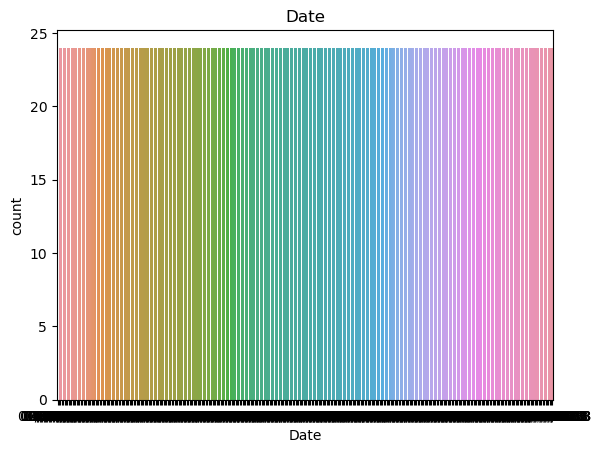

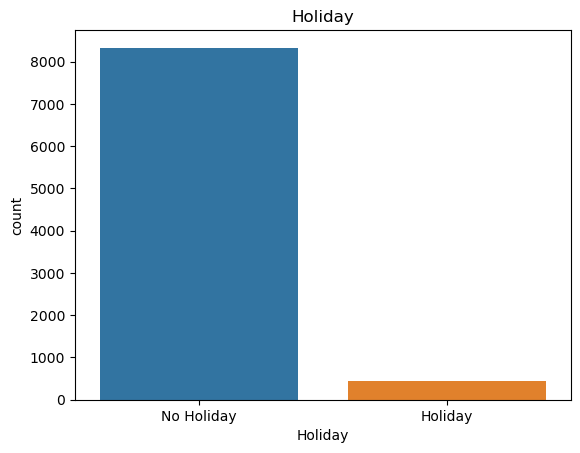

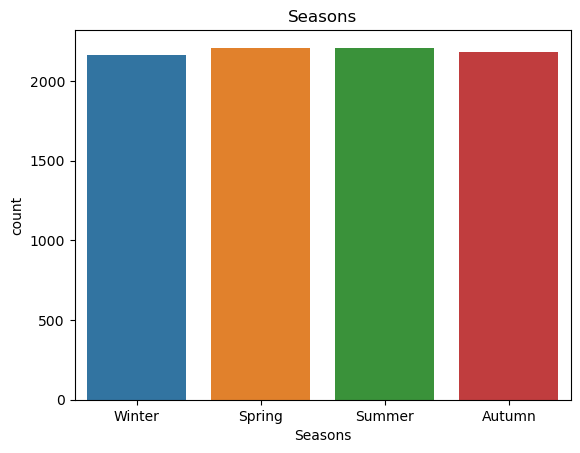

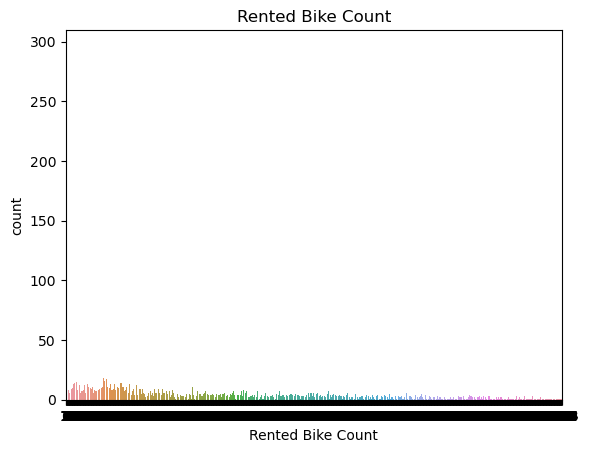

In [110]:
cat_features = data[['Date','Holiday', 'Seasons','Rented Bike Count']]

for i in cat_features:
    plt.title(i)
    ax = sns.countplot(data=data, x=i)
    plt.show()

# este gráfico nos indica que la cantidad de datos que tenemos por día del año es similar

Una vez analizado lo anterior responda las siguientes preguntas:

> b) ¿La gente arrienda más bicicletas en vacaciones o en días de trabajo?

La gente suele arrendar más bicicletas en días de trabajo que en días de vacaciones (en promedio 700 los días de trabajo y 500 los días de vacaciones).

> c) ¿Se arriendan más bicicletas los fines de semana o durante la semana?

Se suelen arrendar más bicicletas los días de semana que los de fin de semana (en semana en promedio sobre 700, y en fin de semana en promedio sobre 600 y bajo 700).

> d) ¿De qué forma afecta el clima al arriendo de bicicletas?

En los gráficos se puede observar que tenemos una distribución más menos pareja de la cantidad de datos por cada estación, que se suelen arrendar más bicicletas en verano que en las otras estaciones, y que en invierno se arriendan considerablemente menos bicicletas que en las otras estaciones. Es por esto, que se puede asumir que cuando el clima es más frio se arriendan menos bicicletas que cuando el clima es cálido.

Para las preguntas b), c) y d) apóyese de los gráficos.

> e) Grafique el promedio de bicicletas arrendadas por estación ('Seasons').

In [111]:
cat_features = data[['isweekday', 'Holiday', 'Seasons']]
for i in cat_features:
    plt.title(i)
    ax = sns.barplot(data=data, x=i, y='Rented Bike Count')
    plt.show()

KeyError: "['isweekday'] not in index"

Responda las siguientes preguntas:

> f) ¿Cuáles son las estaciones en las que más se arriendan bicicletas?

Las estaciones en las que se arriendan más bicicletas son Verano, Otoño y Primavera, en ese orden; y en invierno baja considerablemente la cantidad de bicicletas arrendadas.

> g) Transforme la fecha en variables numéricas, es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.

In [ ]:
# armamos una serie que contiene true si es dia de semana y false si es fin de semana
if 'Date' in data: 
    data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
    data['year'] = data['Date'].dt.year
    data['month'] = data['Date'].dt.month
    data['day'] = data['Date'].dt.day
    data['dayofweek'] = data['Date'].dt.dayofweek
    data.drop('Date', axis=1, inplace=True)
    
# creamos nueva columna que tiene true si el día es de semana y false si es fin de semana
f = lambda x: True if (x < 5) else False
data['isweekday'] = data['dayofweek'].map(f)

> h) Grafique y analice de forma general la correlación entre las variables **numéricas**. 

Podemos observar que son muy pocas las variables que tienen una correlación lineal alta, y las que la tienen, parecieran ser derivadas unas de otras.

In [ ]:
data_corr= data.corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

> i) Escriba sus conclusiones sobre los resultados encontrados en la correlación en la pregunta h)

Dentro de las correlaciones más importantes que se observan en la matriz de covarianza de la pregunta h), se encuentran las de Dew Point Temperature con Temperature, en un grado muy alto, por lo que podría ser buena idea sacar alguna del dataset; Wind Speed, Solar Radiation, Visibility y Dew Point Temperature con la variable Humidity; y dado que nuestro target será la cantidad de biciletas arrendadas (Rented Bike Count), notamos que las variables que más están relacionadas a él son Hour, Temperature and Dew Point Temperature.

### 1.1.3 Separación de conjuntos

> a) Divida el dataset en features _X_ y target _y_, además divida el dataset en un subconjunto de entrenamiento y otro de prueba.

In [112]:
X=data.drop('Rented Bike Count',axis=1)
y=data['Rented Bike Count']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

> b) ¿Para qué es el parámetro stratify?

El parámetro stratify se utiliza en problemas de clasificación, puesto que sirve para dejar distribuidos proporcionalmente las distintas posibilidades de target entre el conjunto de entrenamiento y el de prueba, de modo que no hayan datos con una salida desconocida en el conjunto de test.

> c) Aplique Label Encoding a las variables _Seasons_, _Functioning Day_ y _Holiday_ en el conjunto de entrenamiento y responda para qué sirve y como se usa.

Label Encoding sirve para convertir datos categóricos a datos numéricos, para utilizarlo se debe crear un encoder, y después se debe utilizar la función fit para que el encoder aprenda cómo mapear las clases del conjunto de entrenamiento, a un valor numérico. Posteriormente, se utilza la función transform para poder convertir los datos categóricos a numéricos, tanto del conjunto de entrenamiento como del de test. En este caso en particular, se utilizó sobre el conjunto de train, la función fit_transform, que ejecuta ambas funciones a la vez.

In [54]:
seasons_encoder = preprocessing.LabelEncoder()
holiday_encoder = preprocessing.LabelEncoder()
functioning_day_encoder = preprocessing.LabelEncoder()

X_train["Seasons"] = seasons_encoder.fit_transform(X_train["Seasons"])
X_train["Holiday"] = holiday_encoder.fit_transform(X_train["Holiday"])
X_train["Functioning Day"] = functioning_day_encoder.fit_transform(X_train["Functioning Day"])

> d) Aplique la transformación aprendida por el Label Encoder al conjunto de prueba.

In [55]:
X_test["Seasons"] = seasons_encoder.transform(X_test["Seasons"])
X_test["Holiday"] = holiday_encoder.transform(X_test["Holiday"])
X_test["Functioning Day"] = functioning_day_encoder.transform(X_test["Functioning Day"])

> e) ¿Por qué no se aplica la transformación del Label Encoder directamente sobre el conjunto de datos completo?

Porque el Label Encoder se utiliza sobre los datos categóricos, no sobre los numéricos. Además, si el conjunto de datos sólo tuviese features categóricos, también habría que convertirlos por separado, puesto que cada encoder sirve únicamente para un feature.

## 1.2 Modelos de Regresión

Primero entrenaremos un regresor lineal con los datos _en bruto_, ya que básicamente se transformaron las variables _Date_, _Seasons_ y _Holiday_ tal que todos los datos se puedan procesar por el regresor.

### 1.2.1 Modelo en bruto

> a) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [56]:
reg = LinearRegression().fit(X_train, y_train)

> b) Obtenga el error cuadrático medio de la predicción sobre los datos del conjunto *X_test*

In [57]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

188307.42772772518

> c) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

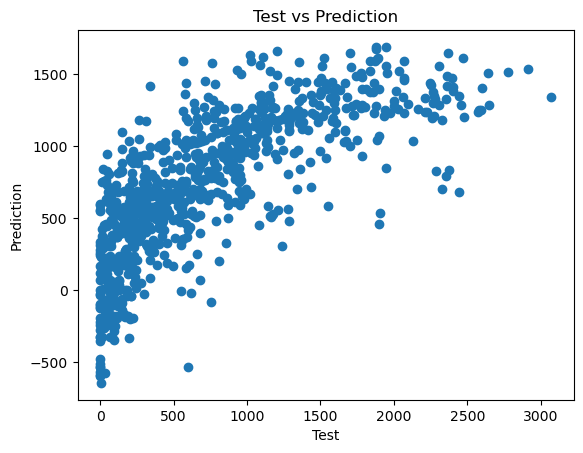

In [58]:
plt.scatter(y_test, y_pred)

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.2 Modelo preprocesado

Variables cíclicas

Si aplicaramos variables _Dummy_ o transformar con _One Hot Encoder_ a la fecha terminaríamos con 12 columnas para los meses, 7 columnas para los días de la semana y 24 columnas para la hora! En lugar de eso nos aprovecharemos de que todas estas variables son cíclicas, es decir, después de 23:00 hrs viene 00:00 hrs y el ciclo se vuelve a repetir, lo mismo para los meses del año y los días de la semana. Entonces podemos pensar en este ciclo como si fuera un _circulo_ utilizando el seno y el coseno de la fecha tenemos las coordenada de la fecha en el _circulo_. De esta forma las 23:00 y las 00:00 son cercanas en esta representación. Gracias a lo anterior nos quedamos con solo 2 columnas.

$\text{var_cos} = \cos(2π\; \text{var}/\text{periodo})$

$\text{var_sin} = \sin(2π\; \text{var}/\text{periodo})$

> a) ¿Por qué no simplemente usar solo el seno o solo el coseno?

In [59]:
X_train['month_sin'] = np.sin(2 * np.pi * X_train['month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['month'] / 12)
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
X_train['hour_cos'] = np.cos(2 * np.pi * X_train['Hour'] / 24)

X_test['month_sin'] = np.sin(2 * np.pi * X_test['month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['month'] / 12)
X_test['hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
X_test['hour_cos'] = np.cos(2 * np.pi * X_test['Hour'] / 24)

X_train.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)
X_test.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)

Estación

> b) Aplique la misma lógica de variable _cíclica_ a la variable _Season_.

In [60]:
X_train['Sin_Season'] = np.sin(2 * np.pi * X_train['Seasons'] / 4) 
X_train['Cos_Season'] = np.cos(2 * np.pi * X_train['Seasons'] / 4)
X_train.drop('Seasons', axis=1, inplace=True)

In [61]:
X_test['Sin_Season'] = np.sin(2 * np.pi * X_test['Seasons'] / 4) 
X_test['Cos_Season'] = np.cos(2 * np.pi * X_test['Seasons'] / 4)
X_test.drop('Seasons', axis=1, inplace=True)

Normalización de variables.

> c) Transforme las variables para que estas sigan una distribución normal con media 0 y varianza 1.



In [62]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = ['Temperature(°C)', 
                     'Humidity(%)', 
                     'Wind speed (m/s)', 
                     'Visibility (10m)', 
                     'Dew point temperature(°C)', 
                     'Solar Radiation (MJ/m2)',	
                     'Rainfall(mm)',	
                     'Snowfall (cm)',
                     'year']

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

> d) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [63]:
reg = LinearRegression().fit(X_train, y_train)

> e) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [64]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)

> f) Calcule el error cuadrático medio en la escala original de bicicletas

In [65]:
mean_squared_error(y_test, y_pred)

185851.02401790887

> g) ¿Mejoran los resultados con respecto al modelo entrenado sobre los datos en bruto?

En bruto: 188307.42772772518

Var. normalizadas: 185851.02401790887

Viendo los errores calculados, podemos observar que el error se ha reducido. Por lo que se puede concluir que el normalizar las variables es un proceso que si es relevante para obtener un buen resultado.

> h) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

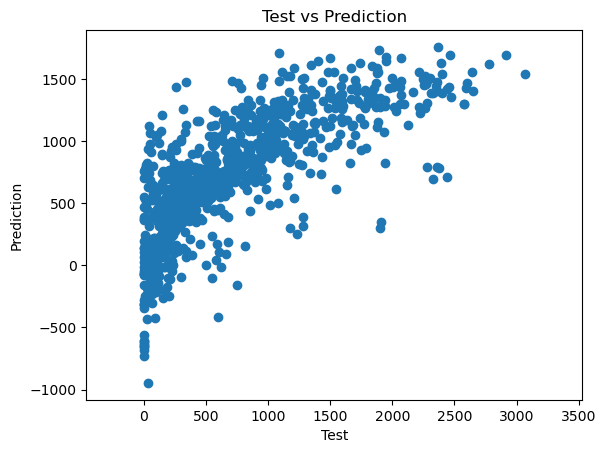

In [66]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

### 1.2.3 Modelo SGD

En esta pregunta aplicaremos el modelo de regresión lineal utilizando el gradiente descendente estocástico (SGD), y para visualizar su rendimiento observaremos el error cuadrático medio a medida que el algoritmo SGD va iterando a través de las _epochs_. Para ello necesitamos separar una porción del conjunto de entrenamiento y así obtener el error de validación del modelo en ejemplos que no ha visto.

> a) Separe el conjunto de entrenamiento en un subconjunto de entrenamiento y uno de validación.

In [67]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25)

Utilize la librería _sklearn_ para entrenar el modelo a través _SGDRegressor_ y responda las siguientes preguntas:

> b) ¿Para qué sirve cada uno de los parametros que acepta _SGDRegressor_? Describa brevemente cada uno.

- loss: se refiere a la función de perdida a usar.
- penalty: se refiere al regularizador a usar para los calculos, puede usar l1, l2, none o elasticnet.
- tol: criterio de detención del algoritmo.
- shuffle: define si se mezcla la data de entrenamiento en cada iteracion del algoritmo.
- warm_start: criterio que permite utilizar la solución de la llamada anterior del algoritmo.

> c) Explique cuál es la función del parámetro alpha y compare, teóricamente, las variaciones de implementación del parámetro disponibles en el módulo, es decir, compare: _constant_ vs _optimal_ vs _invscaling_ vs _adaptive_.

In [69]:
reg = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   )
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
# Alpha regula que tanto efecto tiene la regularizacion.
# learning_rate: forma de aplicar el gradiente.
# - constant: siempre cambia lo mismo (igual eta).
# - optimal: se aplica una heuristica para variar el eta dependiente del valor de alpha.
# - invscaling: se aplica una heuristica para variar el eta.
# - adaptive: se ocupa en eta fijo hasta que no existe mejora, luego se divide por 5 y se sigue aplicando.

Alpha regula que tanto efecto tiene la regularizacion.

learning_rate: forma de aplicar el gradiente.

- Constant: siempre cambia lo mismo (igual eta).
- Optimal: se aplica una heuristica para variar el eta dependiente del valor de alpha.
- Invscaling: se aplica una heuristica para variar el eta.
- Adaptive: se ocupa en eta fijo hasta que no existe mejora, luego se divide por 5 y se sigue aplicando.

Entrene el regresor SGD por 100 _epochs_ como máximo, utilizando *early_stoping* con una paciencia de 10 _epochs_. Grafique el error cuadrático medio por época.

In [84]:
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors, val_errors = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

Stopping training after 18 epochs


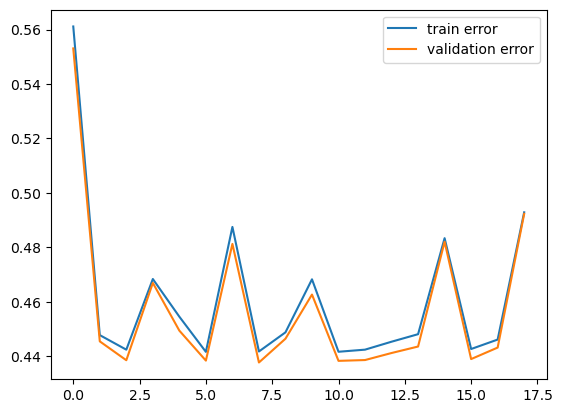

In [85]:
plt.plot(tr_errors, label='train error')
plt.plot(val_errors, label='validation error')
plt.legend()
plt.show()

Responda las siguientes preguntas:

> d) ¿Para qué sirve el *early_stoping*?

Por lo que se puede apreciar en el codigo escrito anteriormente, se puede ver que el *early_stoping* se trata de la forma de que terminamos el algoritmo respecto a un parámetro denominado como paciencia, que deja el margen de iteraciones hasta que el algoritmo deba detenerse.

> e) ¿Cómo se interpretan los resultados del entrenamiento según las curvas obtenidas?

Tal como podemos ver en el gráfico mostrado anteriormente, el error de entrenamiento es ligeramente mayor al error obtenido con el conjunto de validación. Es con este hecho, que podemos ver que a medida que se avanza con las iteraciones, el error de training, va convergiendo al de validación.

> f) ¿Cuántas _epochs_ duró su entrenamiento?

Al momento de escribir esta respuesta, el entrenamiento duró 18 epochs.

> g) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [87]:
y_pred = reg.predict(X_test)
y_reshape = y_pred.reshape(-1,1)
y_pred = y_scaler.inverse_transform(y_reshape)

> h) Calcule el error cuadrático medio en la escala original de bicicletas

In [88]:
mean_squared_error(y_test, y_pred)

208885.83826936875

> i) ¿Mejoran los resultados con respecto al modelo anterior?

- SDG: 208885.83826936875

- Var. normalizadas: 188307.42772772518

Podemos ver con los resultados anteriores, que no mejoraron nuestros resultados usando SDG, más bien, lo contrario, nuestro error aumentó, pasando de 188307.42 a 208885.83.

> j) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

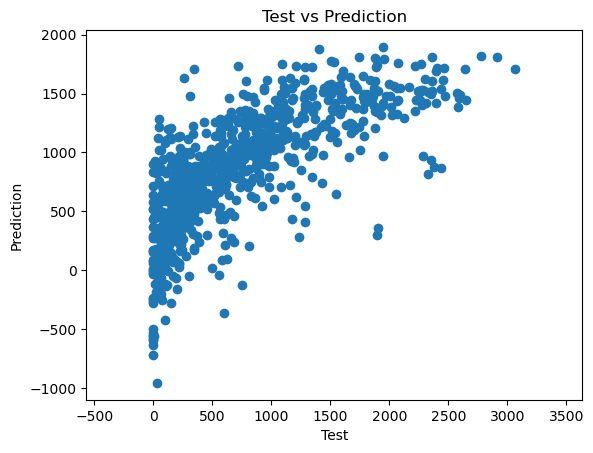

In [89]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.3 Modelo con Regularización

### 1.3.1 Regularización Ridge y Lasso

Agregue regularización Ridge al modelo SGD y entrénelo por 100 _epochs_ como máximo, utilizando early_stoping con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por _epoch_.

In [99]:
k=5
cv_folds=KFold(n_splits=k, shuffle=True)

In [100]:
reg = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=100, #epochs
                   tol=0.001, 
                   shuffle=True,                                       
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.25                   
                   )

In [101]:
reg.fit(X_tr,y_tr)

y_pred = reg.predict(X_test)
y_reshape = y_pred.reshape(-1,1)
y_pred = y_scaler.inverse_transform(y_reshape)
mean_squared_error(y_test, y_pred)

193342.0623584897

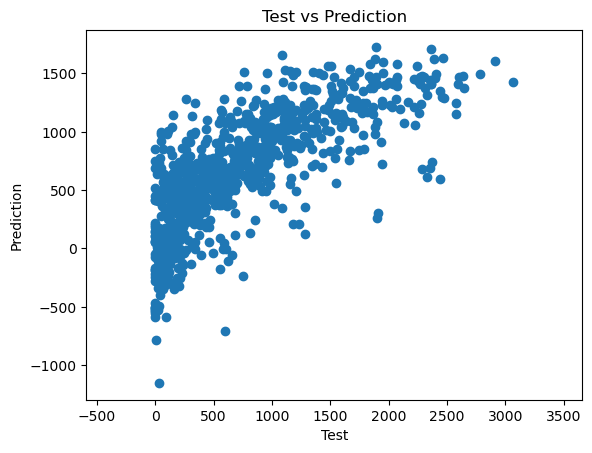

In [102]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

Responda las siguientes preguntas:

> a) ¿Qué son los llamados _hiperparámetros_ de un modelo y como se relacionan con el concepto de _hyper tuning_?
    
Son parámetros que afectan como aprende el modelo, de manera que influyen en el comportamiento y/o su rendimiento. Estos deben ser definidos antes de iniciar el entrenamiento.
    
> b) ¿Cuál es la motivación de agregar una penalización al modelo?

Mejorar la capacidad de generalización del modelo, de manera que aprende que ciertos resultados son mejores o peores para así en el futuro, su capacidad predictiva sea más eficaz.

> c) ¿De qué se compone la penalización mediante regularización Ridge?

Podría decirse que Ridge penaliza a los features que menos aporten al target, de esta manera, disminuimos su influencia en nuestro entrenamiento, pero no los eliminamos completamente de nuestro procedimiento a diferencia de Lasso.

> d) ¿Cómo funciona la regularización Lasso?

Lasso elimina aquellos features que no sean relevante para nuestro target, sin embargo, esta podría causar problemas al eliminar muchos factores o eliminar aquellos que parecieran ser de poca relevancia, de manera que podría causar underfitting.

> e) ¿Cuáles son las ventajas y desventajas de usar regularización Ridge versus Lasso?

Una ventaja de Ridge respecto a Lasso, es que al no eliminar parámetros, mantiene las relaciones entre variables dentro del modelo, lo que evita el underfitting que puede causar Lasso.

Una desventaja de Ridge es que justamente, no elimina parámetros, por lo que aquellos que no sean relevantes o tengan poca influencia en nuestro target no podrán ser eliminados, perdiendo así la oportunidad de disminuir la complejidad de nuestro modelo y de esta manera, disminuir el tiempo de entrenamiento.

> f) Utilizando GridSearchCV optimize el hiperparámetro _learning rate_ para los valores 0.1, 0.01, 0.001.

> g) Pruebe con distintos tipos de _learning rate_ 'constant', 'optimal', 'invscaling'.

> h) Optimize también los hiperparámetros de coeficiente de regularización de l2 y l1 para los valores 0.0001, 0.001, 0.01.

> **Nota:** Investigue y lea la documentación de SGDRegressor, de KFold y de GridSearchCV antes de modificar y ejecutar el código, recuerde que el código presentado en el notebook es solo una guía de referencia y no necesariamente funciona, usted puede modificar su propio código y explicar su funcionamiento.

In [93]:
param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1'],
              'alpha': [0.0001, 0.001, 0.01],                
              'learning_rate': ['constant', 'optimal', 'invscaling']}

hypereg = GridSearchCV(reg, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

In [94]:
hypereg.fit(X_train, y_train)

C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kevin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SGDRegressor(max_iter=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.1, 0.01, 0.001],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'penalty': ['l2', 'l1']},
             scoring='neg_mean_squared_error')

> i) Obtenga los resultados para cada hiperparámetro de la grilla.

In [95]:
pd.DataFrame(hypereg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020473,0.001609,0.004120,0.001039,0.0001,0.1,constant,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-2.489856e+26,-5.676179e+26,-2.847132e+26,-1.929237e+25,-4.908789e+26,-3.222976e+26,1.934948e+26,49
1,0.024803,0.004852,0.003812,0.001615,0.0001,0.1,constant,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-5.940591e+25,-5.400238e+26,-2.180947e+27,-1.337117e+27,-1.172013e+27,-1.057901e+27,7.235199e+26,54
2,0.064505,0.005695,0.004301,0.000945,0.0001,0.1,optimal,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-1.374700e+25,-2.560629e+23,-1.528884e+25,-9.517826e+24,-1.846187e+25,-1.145432e+25,6.296294e+24,47
3,0.135508,0.009725,0.005051,0.001362,0.0001,0.1,optimal,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-5.853379e+23,-2.941837e+24,-1.728044e+23,-8.504286e+24,-1.507717e+24,-2.742396e+24,3.033786e+24,39
4,0.066641,0.011498,0.004007,0.001277,0.0001,0.1,invscaling,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-3.664034e+21,-2.752192e+20,-8.580034e+21,-8.843962e+15,-7.107751e+19,-2.518075e+21,3.329247e+21,34
5,0.105551,0.022826,0.004117,0.000668,0.0001,0.1,invscaling,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-2.777767e+19,-9.778897e+20,-1.496181e+18,-1.252702e+23,-4.566407e+21,-2.616876e+22,4.957906e+22,36
6,0.021972,0.004021,0.004092,0.000975,0.0001,0.01,constant,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-5.021643e+22,-2.434901e+23,-3.674454e+24,-4.632715e+24,-9.639571e+24,-3.648089e+24,3.504398e+24,41
7,0.027109,0.003356,0.004365,0.001471,0.0001,0.01,constant,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-1.581598e+23,-7.356671e+22,-9.457001e+23,-1.758361e+25,-5.375681e+22,-3.762959e+24,6.918262e+24,42
8,0.079513,0.006171,0.005084,0.000847,0.0001,0.01,optimal,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-9.699257e+24,-2.030846e+24,-3.329841e+24,-2.935202e+25,-4.949332e+24,-9.872259e+24,1.007985e+25,46
9,0.120773,0.020418,0.003908,0.000590,0.0001,0.01,optimal,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-1.338657e+25,-5.803317e+23,-7.383496e+23,-1.849796e+23,-3.610143e+23,-3.050250e+24,5.171590e+24,40


> j) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [103]:
y_pred = hypereg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred.reshape(-1,1))

> k) Calcule el error cuadrático medio en la escala original de bicicletas

In [104]:
mean_squared_error(y_test,y_pred)

186803.85053338515

> l) ¿Mejoran los resultados con respecto a los modelo anteriores?

- SDG: 208885.83826936875

- En bruto: 188307.42772772518

- Var. normalizadas: 185851.02401790887

- Ridge: 186803.85053338515

Según los errores obtenidos, mejora respecto a SDG y la regresión lineal realizada con los datos en bruto, sin embargo, no es capaz de superar al procedimiento realizado con las variables normalizadas.

> m) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

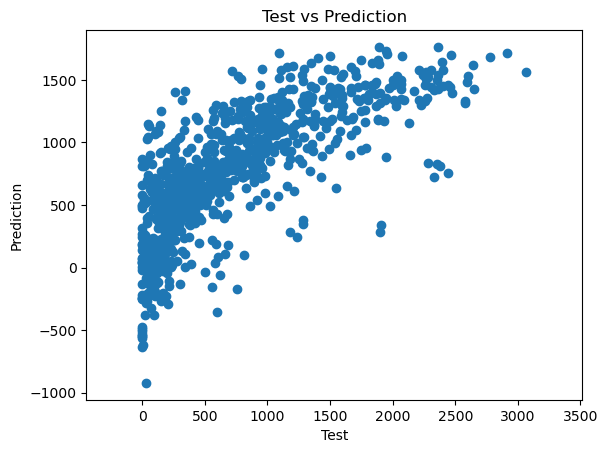

In [105]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.4 Conclusiones:

A través de los procedimientos realizados a lo largo de esta sección, se puede ver que normalizar las variables es un factor determinante a la hora de obtener buenos resultados (un menor error), junto con ello, es posible realizar la hipotesis de que realizar una regularización (Ridge o Lasso, dependiendo del contexto del problema), tambien podría influir de manera positiva en nuestro entrenamiento, para de esta forma, obtener resultados aún mejores.

# 2. Clasificación de hongos





La tarea de clasificación se refiere a un problema en el que se tiene un conjunto de datos y se quiere predecir la clase a la que pertenece cada elemento del conjunto de datos.

Para hacer esto, utilizaríamos un algoritmo de clasificación que examina las características de cada fruta en el conjunto de datos y aprende patrones que pueden ser utilizados para predecir su clase.

Hay muchos algoritmos de clasificación diferentes que se pueden utilizar en el aprendizaje automático, por ejemplo la regresión logística, el SVM (máquina de soporte vectorial), Random Forest y redes neuronales, etcétera.

Una vez que se entrena el modelo, se utiliza para predecir la clase de nuevos datos que no se incluyeron en el conjunto de datos original. Para medir el desempeño del modelo, se pueden utilizar diferentes métricas de evaluación, como la precisión, el recall y la F1-score.

La tarea de clasificación es muy útil en muchas áreas, como la medicina, la banca, el comercio electrónico y la publicidad, ya que permite la automatización de tareas que antes requerían una gran cantidad de tiempo y recursos humanos.

<center><img src=https://w0.peakpx.com/wallpaper/496/595/HD-wallpaper-red-mushroom-mushroom-red-beautiful.jpg></center>

Este conjunto de datos incluye descripciones de muestras correspondientes a 23 especies de hongos de la familia Agaricus y Hongo Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Audubon Society. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se ha combinado con la venenosa.

## 2.1 Manipulación y exploración del conjunto de datos

In [ ]:
# !kaggle datasets download -d uciml/mushroom-classification

In [ ]:
# !unzip mushroom-classification.zip

In [114]:
df = pd.read_csv('mushrooms.csv')

In [115]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [116]:
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
class,object,8124,2,0,0.0
cap-shape,object,8124,6,0,0.0
cap-surface,object,8124,4,0,0.0
cap-color,object,8124,10,0,0.0
bruises,object,8124,2,0,0.0
odor,object,8124,9,0,0.0
gill-attachment,object,8124,2,0,0.0
gill-spacing,object,8124,2,0,0.0
gill-size,object,8124,2,0,0.0
gill-color,object,8124,12,0,0.0


### 2.1.1 Exploración de features

> a) ¿Por qué la variable _veil-type_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.

Porque existe un único valor en esa feature (al menos en los datos de nuestro dataset), por lo que no aporta información para la predicción.

<AxesSubplot:xlabel='veil-type', ylabel='count'>

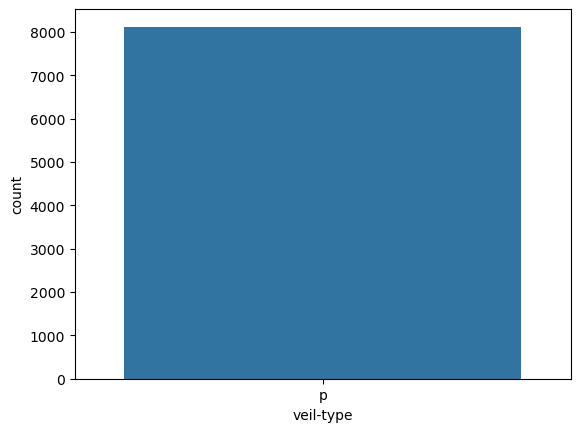

In [117]:
sns.countplot(x="veil-type", data=df)

In [118]:
df.drop('veil-type', axis=1, inplace=True)

> b) Grafique la distribución de cada variable

C:\Users\kevin\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


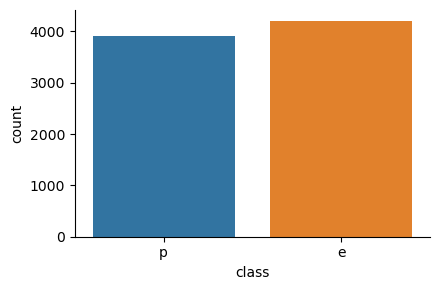

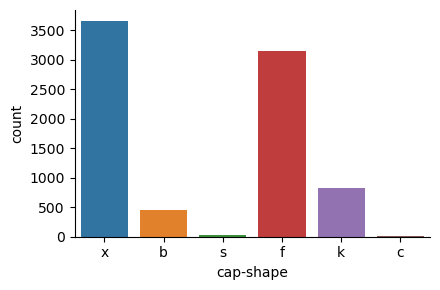

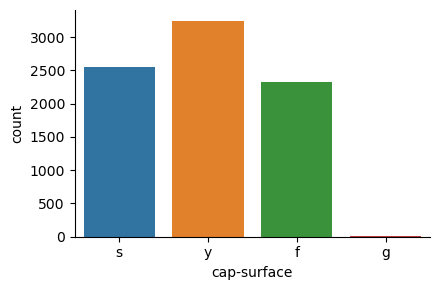

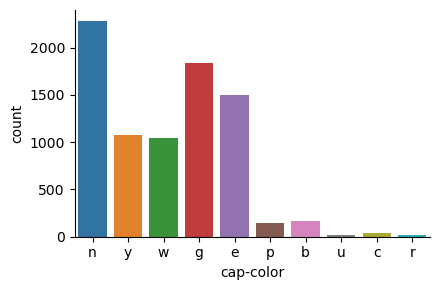

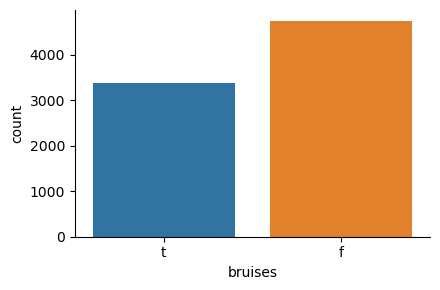

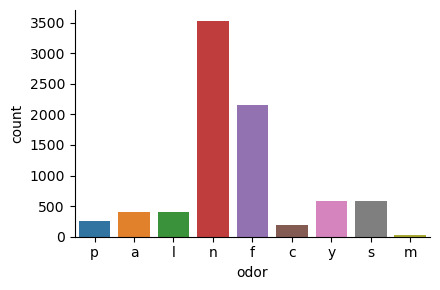

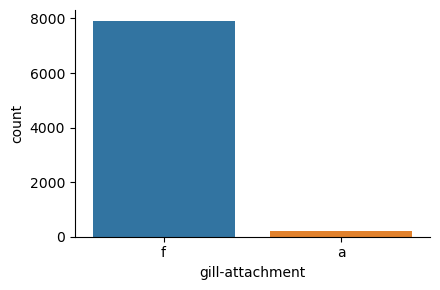

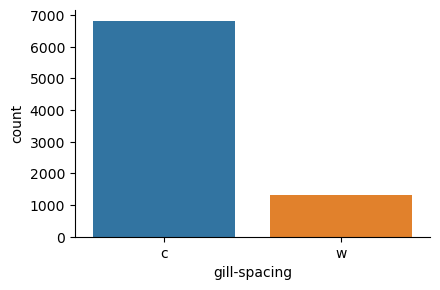

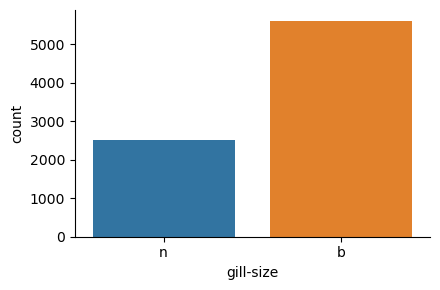

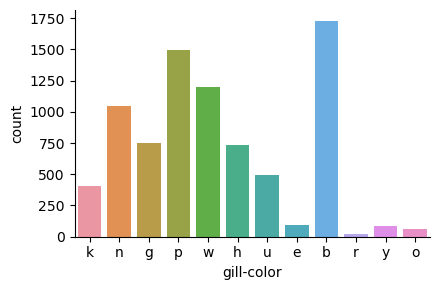

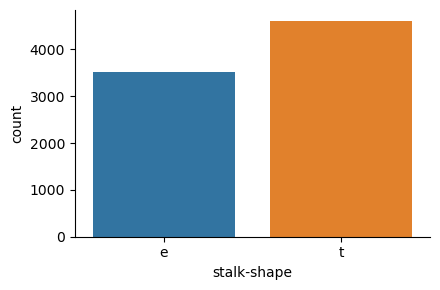

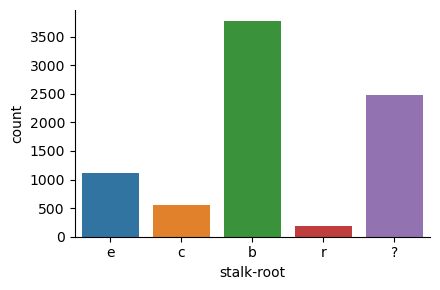

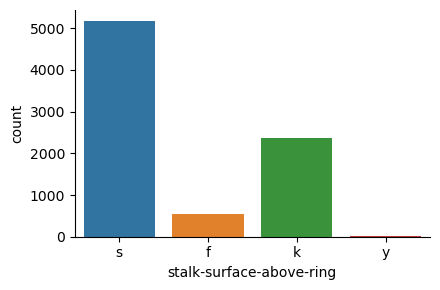

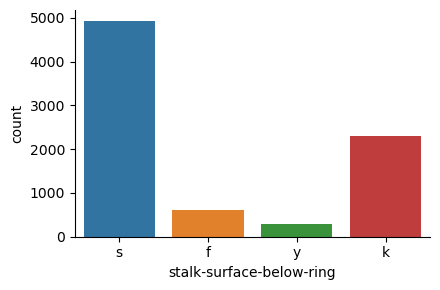

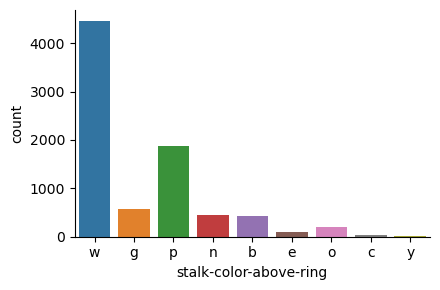

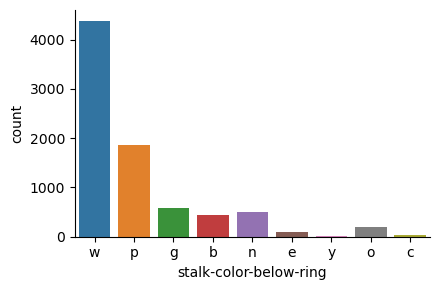

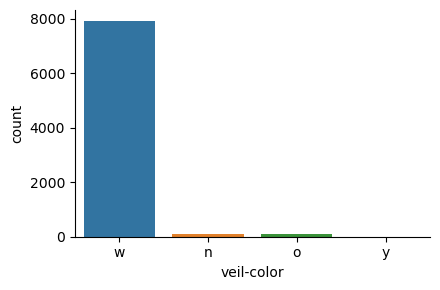

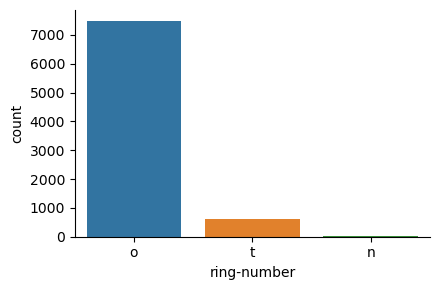

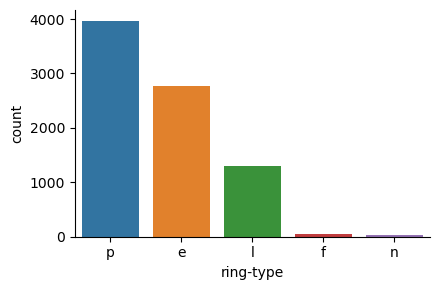

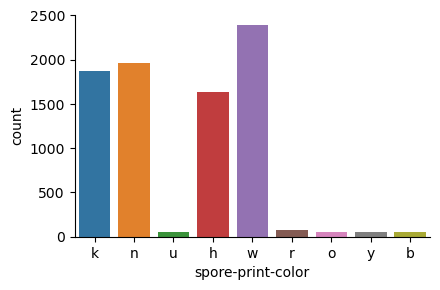

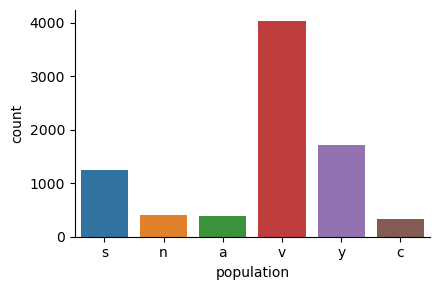

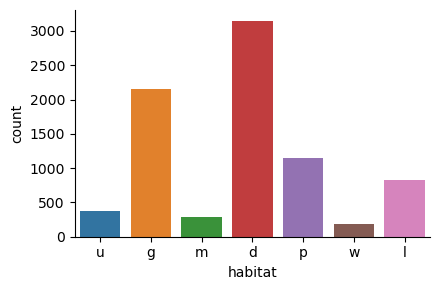

In [119]:
for col in df.columns:    
    sns.catplot(x=col, kind="count", data=df, height=3, aspect=1.5)

> c) Separe el conjunto de datos en los subconjuntos de entrenamiento y prueba.

> d) Codifique las variables de entrada para que puedan ser trabajadas en las siguientes preguntas.

> e) Separe los subconjuntos en _X_ e _y_

In [120]:
# load data and split into train/test sets
train_set = df.sample(frac=0.7, random_state=42)
test_set = df.drop(train_set.index)

# create a list to store the columns to be dropped
drop_cols = []

# iterate over columns and check for binary variables
for col in train_set.columns:
    if len(train_set[col].unique()) == 2:
        # convert binary variables to 0/1
        train_set[col] = pd.factorize(train_set[col])[0]
        test_set[col] = pd.factorize(test_set[col])[0]
    else:
        # get dummies for categorical variables with more than 2 categories
        train_set = pd.concat([train_set, pd.get_dummies(train_set[col], prefix=col)], axis=1)
        test_set = pd.concat([test_set, pd.get_dummies(test_set[col], prefix=col)], axis=1)
        # add the original column to the list of columns to be dropped
        drop_cols.append(col)

# drop the original categorical columns from the train and test sets
train_set.drop(drop_cols, axis=1, inplace=True)
test_set.drop(drop_cols, axis=1, inplace=True)

# ensure that the train and test sets have the same columns
train_set, test_set = train_set.align(test_set, join='outer', axis=1, fill_value=0)

# print the shapes of the train and test sets
print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)

Train set shape: (5687, 112)
Test set shape: (2437, 112)


In [121]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

### 2.1.2 Principal Component Analisis

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad comúnmente usada en machine learning para reducir el número de características en el conjunto de datos conservando la información más importante.

> a) Aplique PCA a los datos preprocesados para reducir el número de características a un conjunto más pequeño de componentes principales que capturen los patrones más importantes de los datos. Pruebe con n_components = n_features - k, donde k={1,10,50}, es decir, cree 3 posibles transformaciones de "*X_train*" y apliquelas sobre "*X_test*".

**Nota:** En adelante se le llamará "representación de los datos" a las distintas _feature selection/extraction_, por ejemplo: una posible representación de los datos es aplicar PCA con las 80 componentes principales.

In [122]:
# creamos una instancia de PCA con las distintas dimensionalidades que queremos obtener
pca1 = PCA(n_components=111-1)
pca10 = PCA(n_components=111-10)
pca50 = PCA(n_components=111-50)

# entrenamos nuestros algoritmos con los datos de entrenamiento
pca1.fit(X_train)
pca10.fit(X_train)
pca50.fit(X_train)

X_train_pca = []
X_test_pca = []

# reducimos la dimensionalidad de cada uno de nuestros conjuntos de datos, con las distintas dimensionalidades
X_train_pca.append(pca1.transform(X_train))
X_test_pca.append(pca1.transform(X_test))

X_train_pca.append(pca10.transform(X_train))
X_test_pca.append(pca10.transform(X_test))

X_train_pca.append(pca50.transform(X_train))
X_test_pca.append(pca50.transform(X_test))

### 2.1.3 Mutual Information

La información mutua es una medida de dependencia entre variables, se puede usar para medir el grado de asociación entre las _features_ y el _target_, y usar esta información para seleccionar las _features_ más relevantes para posteriormente realizar la clasificación. Al utilizar la información mutua para seleccionar las características más informativas, puede mejorar potencialmente el rendimiento de su modelo de aprendizaje automático reduciendo la cantidad de información irrelevante o redundante en el conjunto de datos.

> a) Calcule la información mutua entre cada característica y la variable objetivo (comestible o venenoso) para medir el grado de asociación entre cada característica y la variable objetivo.

> b) Seleccione las n características con las puntuaciones de información mutua más altas como entrada para un modelo de aprendizaje automático. Pruebe con n = n_features - k, para k={1,10,50}, es decir, cree 3 posibles transformaciones de "X_train" y apliquelas sobre "X_test".





In [123]:
mi = mutual_info_classif(X_train, y_train)

In [124]:
# set k to the number of features you want to exclude
k = 1, 10, 50

X_train_mi = []
X_test_mi = []

for i in k:
    # compute the number of features to select
    n = len(mi) - i

    # get the indices of the features sorted by mutual information score
    sorted_indices = np.argsort(mi)

    # select the top n features
    selected_indices = sorted_indices[-n:]
    
    # delete columns that doesn't give information
    X_train_mi.append(X_train.iloc[:, selected_indices])
    X_test_mi.append(X_test.iloc[:, selected_indices])

## 2.2 Modelos de clasificación

Primero entrenaremos el modelo Naïve Bayes con los conjuntos de datos de entrenamiento generados en el punto 2.1, luego entrenaremos otros clasificadores utilizando como conjunto de entrenamiento la mejor representación de los datos según las metricas de clasificación obtenidas con el modelo Naïve Bayes.

### 2.2.1 Naïve Bayes

Naïve Bayes es un modelo generativo clásico para la clasificación en el aprendizaje automático. En el contexto de la clasificación de hongos, puede utilizar Naïve Bayes para modelar la distribución de probabilidad de cada característica dada la etiqueta de clase (comestible o venenosa) y utilizar la regla de Bayes para calcular la probabilidad posterior de cada etiqueta de clase dadas las características observadas.

Al utilizar Naïve Bayes para la clasificación, se puede conseguir un buen rendimiento con cantidades relativamente pequeñas de datos de entrenamiento y modelos relativamente sencillos. Sin embargo, Naïve Bayes asume que las características son condicionalmente independientes dada la etiqueta de clase, lo que puede no ser cierto en la práctica. No obstante, Naïve Bayes puede ser un modelo _baseline_ útil para comparar con modelos más complejos.

Dado el conjuntos de entrenamiento con características observadas, se utiliza la regla de Bayes para calcular la probabilidad a posteriori de cada etiqueta de clase dadas las características observadas. La etiqueta de clase con la probabilidad a posteriori más alta sería la etiqueta de clase predicha para la muestra de hongos.

Si consideramos que $P(x_1, \dots, x_n)$ es constante, entonces:

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y).\end{aligned}\end{align}

Usted deberá utilizar la estimación Máxima A Posteriori (MAP) para estimar $P(y)$ y $P(x_i \mid y)$, donde $P(y)$ es la frecuancia relativa de la clase $y$ y $P(x_i \mid y)$ asumiremos que se distribuye de forma Gaussiana, es decir:

\begin{align}\begin{aligned}P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)\end{aligned}\end{align}

> a) ¿Qué otras distribuciones de probabilidad se pueden asumir para este problema considerando los valores posibles de las _features_ y del target en el conjunto de datos? Nombre mínimo 2.

T-student: sabemos que esta distribución se utiliza cuando el número total de observaciones es demasiado pequeño como para seguir una distribución normal, y cuando no conocemos sus desviaciones estandar. Es por esto, que creemos que esta distribución de probabilidad es capaz de entregarnos resultados para este problema.

Bernoulli: se podría utilizar debido a que la distribución de Bernoulli sirve cuando el resultado de un experimento es éxito o fracaso (binario), y en este caso el target también lo es.

Para las preguntas b) y c) considere que los datos siguen una distribución de probabilidad Gaussiana y entrene el clasificador utilizando el módulo _GaussianNB_ de la librería _sklearn_.

> b) Entrene el clasificador Naïve Bayes con los datos en _bruto_, es decir, tal cual como vienen, sin haber aplicado ninguna extracción o selección de características.



In [125]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_raw = clf.predict(X_test)

> c) Entrene el clasificador Naïve Bayes con cada una de las representaciones obtenidas en el punto 2.1.

In [126]:
clf = GaussianNB()

y_pred_mi = []
y_pred_pca = []

for i in range(len(X_train_mi)):
    clf.fit(X_train_mi[i], y_train)
    y_pred_mi.append(clf.predict(X_test_mi[i]))

for i in range(len(X_train_pca)):
    clf.fit(X_train_pca[i], y_train)
    y_pred_pca.append(clf.predict(X_test_pca[i]))

> d) Para cada representación de los datos del punto 2.1, obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [127]:
print("=" * 30 + " MI " + "=" * 30 + "\n")

for y_pred in y_pred_mi:
    print(classification_report(y_test, y_pred, target_names=['edible', 'poisonous']))
    
print("=" * 30 + " PCA " + "=" * 30 + "\n")
    
for y_pred in y_pred_pca:
    print(classification_report(y_test, y_pred, target_names=['edible', 'poisonous']))

============================== MI ==============================

              precision    recall  f1-score   support

      edible       1.00      0.99      0.99      1303
   poisonous       0.99      1.00      0.99      1134

    accuracy                           0.99      2437
   macro avg       0.99      0.99      0.99      2437
weighted avg       0.99      0.99      0.99      2437

              precision    recall  f1-score   support

      edible       1.00      0.99      0.99      1303
   poisonous       0.99      1.00      0.99      1134

    accuracy                           0.99      2437
   macro avg       0.99      0.99      0.99      2437
weighted avg       0.99      0.99      0.99      2437

              precision    recall  f1-score   support

      edible       0.98      0.98      0.98      1303
   poisonous       0.98      0.98      0.98      1134

    accuracy                           0.98      2437
   macro avg       0.98      0.98      0.98      2437
weighted

> e) Determine la mejor representación de los datos según las metricas obtenidas en la pregunta anterior y utilice esa representación de aquí en adelante para entrenar a los otros clasificadores.

De los resultados obtenidos, se puede ver que el que mejor generaliza es aquel que ocupa el procedimiento MI eliminando 10 features. Dado que obtiene mejor f1-score que los demás.

> f) Muestre los errores tipo 1 y tipo 2.

<AxesSubplot:>

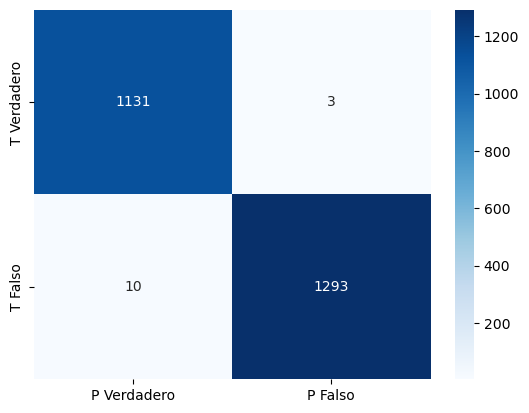

In [131]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred_mi[1])  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[tp, fn], [fp, tn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['P Verdadero', 'P Falso'], 
            yticklabels=['T Verdadero', 'T Falso'])


### 2.2.2 Linear Discriminant Analisis

El análisis discriminante lineal (LDA) es un algoritmo clásico de clasificación lineal, y su objetivo es encontrar una combinación lineal de características que maximice la separación entre las dos clases (setas comestibles y venenosas). En otras palabras, el LDA intenta proyectar los datos en un espacio de menor dimensión, preservando al mismo tiempo la mayor discriminación de clases posible.

La etiqueta de clase con la media más cercana en el espacio transformado sería la etiqueta de clase predicha para la muestra de setas.

> a) ¿Qué es lo que asume el modelo LDA sobre la distribución condicional de las clases?

El modelo LDA, así como los otros modelos de clasificación vistos en clases, asumen que los datos entregados son linealmente separables.

> b) ¿Qué es lo que asume el modelo LDA sobre las matrices de covarianza de la distribución condicional?

Asume que la matriz de covarianza de cada clase es la misma.

> c) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

In [132]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [142]:
clf = LinearDiscriminantAnalysis(n_components=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [143]:
print(classification_report(y_test, y_pred, target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1303
   poisonous       1.00      1.00      1.00      1134

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



> e) Muestre los errores tipo 1 y tipo 2.

<AxesSubplot:>

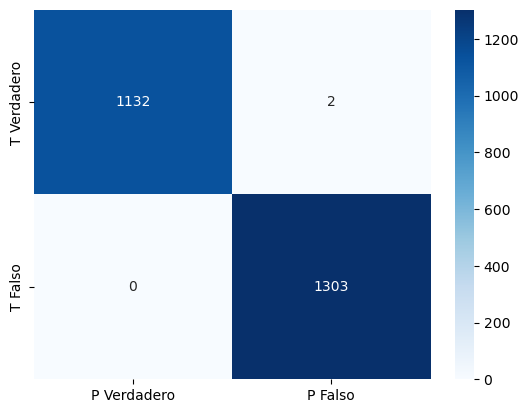

In [144]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[tp, fn], [fp, tn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['P Verdadero', 'P Falso'], 
            yticklabels=['T Verdadero', 'T Falso'])

### 2.2.3 Regresión logística

La regresión logística es un modelo discriminativo de clasificación clásico que puede utilizarse para la clasificación de hongos. El objetivo de la regresión logística es encontrar el modelo lineal que mejor se ajuste y que pueda predecir la probabilidad de que cada muestra de hongo pertenezca a una clase determinada (comestible o venenosa).

> a) ¿En qué consiste la estimación de máxima verosimilitud de coeficientes?

Este consiste en estimar aquellos coeficientes que tienen mayor probabilidad de generalizar satisfactoriamente nuestro modelo.

> b) ¿Qué asume este modelo de la relación entre las características y la variable objetivo?

Asume que hay una relación logarítmica lineal entre la varriable objetivo y las características.

> c) ¿Qué se hace para evitar el sobreajuste de este modelo?

Se realiza una regularización o una feature extraction/selection, de manera que podamos acotar la complejidad de nuestro modelo disminuyendo nuestras features (o seleccionando aquellas relevantes).

> d) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

**Nota:** Usted puede variar o probar con distintos hiperparámetros siempre y cuando se utilizen de forma correcta el modelo y los datos para que pueda obtener predicciones comparables con los otros modelos. Puede basarse en los hiperparámetros probados con el regresor logistico y en la documentación de la librería.

In [146]:
from sklearn.linear_model import LogisticRegression

In [147]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train_mi[1], y_train)

y_pred = clf.predict(X_test_mi[1])


for i in range(len(X_train_mi)):
    clf.fit(X_train_mi[i], y_train)
    y_pred_mi.append(clf.predict(X_test_mi[i]))

> e) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [148]:
print(classification_report(y_test, y_pred, target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       0.98      0.99      0.99      1303
   poisonous       0.99      0.98      0.98      1134

    accuracy                           0.99      2437
   macro avg       0.99      0.99      0.99      2437
weighted avg       0.99      0.99      0.99      2437



> f) Muestre los errores tipo 1 y tipo 2.

<AxesSubplot:>

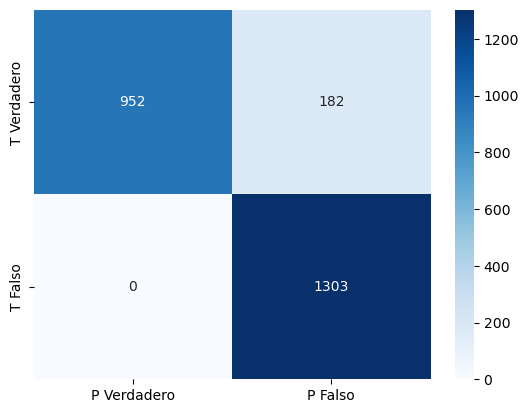

In [170]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[tp, fn], [fp, tn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['P Verdadero', 'P Falso'], 
            yticklabels=['T Verdadero', 'T Falso'])


### 2.2.4 Support Vector Machines

Las máquinas de vectores soporte (SVM) son un algoritmo de aprendizaje automático potente y versátil que puede utilizarse para la clasificación de hongos. La idea principal detrás de SVM es encontrar el hiperplano que mejor separa las diferentes clases en el conjunto de datos.

Utilice los datos de entrenamiento para ajustar un modelo SVM a los datos. Esto implica encontrar el hiperplano que maximice el margen entre las muestras positivas y negativas. El margen es la distancia entre el hiperplano y las muestras más cercanas de cada clase.

Si los datos no se pueden separar linealmente, utilice funciones de kernel para transformar los datos en un espacio de mayor dimensión en el que se puedan separar. Las funciones kernel más comunes incluyen funciones polinómicas, de base radial (RBF) y sigmoidales.

Entrene un clasificador SVM con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

Entrene el clasificador con los siguientes tipos de _kernel_:

> a) Lineal, con 2 valores del coeficiente gamma distintos.





In [157]:
from sklearn.svm import NuSVC
preds_linear = []
preds_poly = []
preds_rbf = []
lista_gamma = ['scale',0.1]

In [158]:
for gamma in lista_gamma:
    clf = NuSVC(kernel='linear', gamma=gamma)
    clf.fit(X_train_mi[1], y_train)
    preds_linear.append(clf.predict(X_test_mi[1]))

> b) Polinómico, con 2 valores del coeficiente gamma distintos.

In [159]:
for gamma in lista_gamma:
    clf = NuSVC(kernel='poly', gamma=gamma)
    clf.fit(X_train_mi[1], y_train)
    preds_poly.append(clf.predict(X_test_mi[1]))

> c) rbf, con 2 valores del coeficiente gamma distintos.

In [160]:
for gamma in lista_gamma:
    clf = NuSVC(kernel='rbf', gamma=gamma)
    clf.fit(X_train_mi[1], y_train)
    preds_rbf.append(clf.predict(X_test_mi[1]))

> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [162]:
print(classification_report(y_test, preds_linear[0], target_names=['edible', 'poisonous']))
print(classification_report(y_test, preds_linear[1], target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       0.86      1.00      0.92      1303
   poisonous       1.00      0.81      0.90      1134

    accuracy                           0.91      2437
   macro avg       0.93      0.91      0.91      2437
weighted avg       0.92      0.91      0.91      2437

              precision    recall  f1-score   support

      edible       0.86      1.00      0.92      1303
   poisonous       1.00      0.81      0.90      1134

    accuracy                           0.91      2437
   macro avg       0.93      0.91      0.91      2437
weighted avg       0.92      0.91      0.91      2437



In [163]:
print(classification_report(y_test, preds_poly[0], target_names=['edible', 'poisonous']))
print(classification_report(y_test, preds_poly[1], target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       0.87      1.00      0.93      1303
   poisonous       1.00      0.83      0.91      1134

    accuracy                           0.92      2437
   macro avg       0.94      0.92      0.92      2437
weighted avg       0.93      0.92      0.92      2437

              precision    recall  f1-score   support

      edible       0.87      1.00      0.93      1303
   poisonous       1.00      0.83      0.91      1134

    accuracy                           0.92      2437
   macro avg       0.94      0.92      0.92      2437
weighted avg       0.93      0.92      0.92      2437



In [164]:
print(classification_report(y_test, preds_rbf[0], target_names=['edible', 'poisonous']))
print(classification_report(y_test, preds_rbf[1], target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       0.87      1.00      0.93      1303
   poisonous       1.00      0.83      0.91      1134

    accuracy                           0.92      2437
   macro avg       0.94      0.92      0.92      2437
weighted avg       0.93      0.92      0.92      2437

              precision    recall  f1-score   support

      edible       0.88      1.00      0.93      1303
   poisonous       1.00      0.84      0.91      1134

    accuracy                           0.93      2437
   macro avg       0.94      0.92      0.92      2437
weighted avg       0.93      0.93      0.92      2437



> e) Muestre los errores tipo 1 y tipo 2.

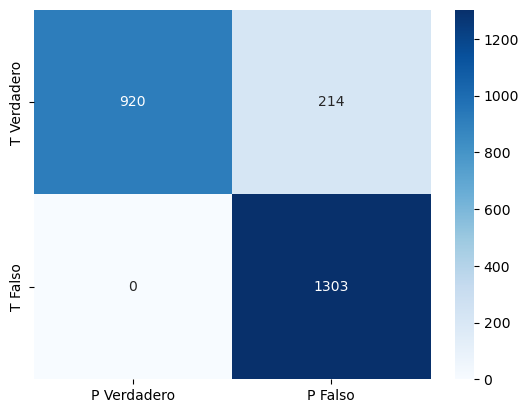

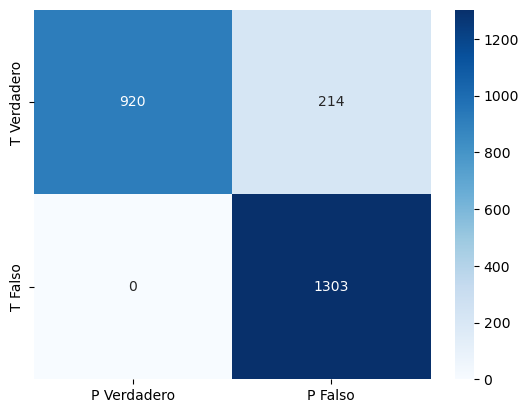

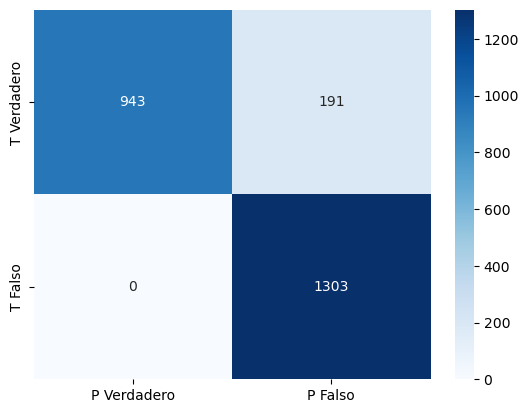

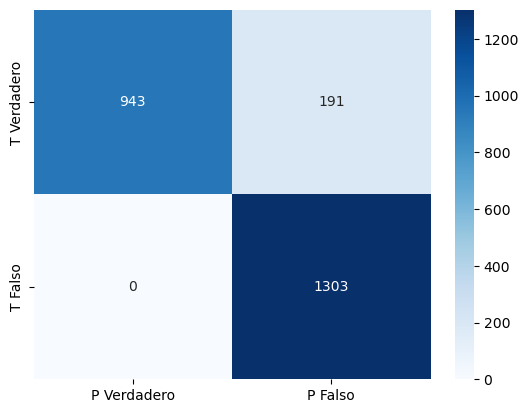

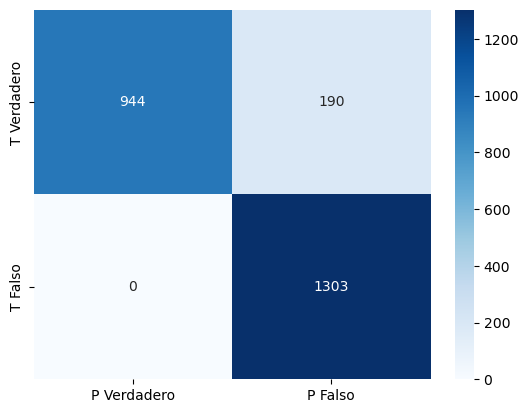

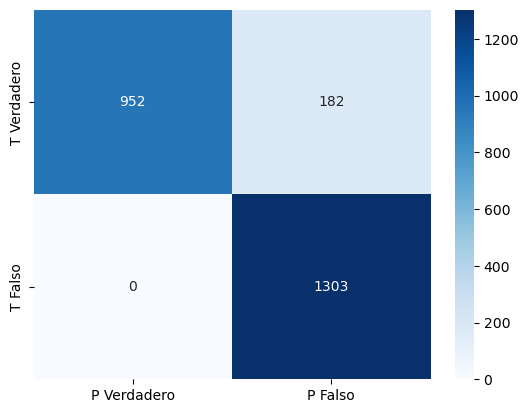

In [171]:
for lista in [preds_linear,preds_poly,preds_rbf]:
    for y_pred in lista:
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        error_matrix = [[tp, fn], [fp, tn]]
        sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['P Verdadero', 'P Falso'], 
            yticklabels=['T Verdadero', 'T Falso'])
        plt.show()
    print("=" * 60)

## 2.3 Conclusiones:

- De acuerdo a los resultados observados, se pudo apreciar que MI entregó mejores resultados en la predicción de las clases venenoso y comestible para el dataset de hongos. Esto se puede explicar debido a que MI considera al target en la selección de características, lo que permite mantener la información relevante en la predicción, a diferencia de PCA.
- Por otro lado, pudimos corroborar que SVM es considerablemente más lento que N. Bayes, puesto que realiza un procedimiento más extensivo. en esta ocasión, se puede ver que los resultados con Bayes son ligeramente mejores que con SVM. Aunque, cabe mencionar, que no existen falsos verdaderos, por lo que este método solo señaló aquellos verdaderos que tienen probabilidades de ser reales. Por esta misma razón, es que si tuviesemos que elegir algún método para un problema similar, escogeríamos SVM por sobre Naive Bayes, puesto que tenemos seguridad de que aquellos output que la hipótesis dijo que eran venenosos, realmente lo eran (cabe mencionar que, según nuestra lógica, los verdaderos son venenosos).